# Open Rice

** 1.) ** We scrapped a data set from open rice but it needs cleaning:

* Remove duplicate data
* Use a regex to clean the review col
* Remove the trailing commar from the adress col


In [1]:
import pandas as pd

In [2]:
openrice = pd.read_csv("data/open-rice.csv")

In [3]:
openrice.head()

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range
0,"Shop J-K., 200 Hollywood Road,",5838,6,Hong Kong Style,78,For Kee Restaurant 科記咖啡餐室,(133 Reviews),Below $50
1,"G/F, 108 Hollywood Road,",3492,2,International,20,Blue · Butcher & Meat Specialist,(30 Reviews),$201-400
2,"G/F, 206 Hollywood Road,",5517,5,Thai,31,Chachawan,(43 Reviews),$201-400
3,"Shop 3018, 3/F, Shun Tak Centre, 168-200 Conna...",1173,1,Hong Kong Style,23,Capital Café 華星冰室,(39 Reviews),Below $50
4,"G/F, 38 Queens Road West,",1064,1,Indian,50,Namaste Kitchen 滋味廚房,(57 Reviews),$51-100


** 2.) ** Which resturant in Hong Kong is the most favorable? In terms of likes, in terms of bookmarks?

In [11]:
sort_bookmark = openrice.sort_values(['bookmarks'], ascending = False)
sort_likes = openrice.sort_values(['likes'], ascending = False)
print("Best by Bookmark:\n {} \n\n Best by Likes:\n {}".format(sort_bookmark.head(1)['name'],sort_likes.head(1)['name']))

Best by Bookmark:
 6149    The Place
Name: name, dtype: object 

 Best by Likes:
 20272    Pom's Kitchen & Deli
Name: name, dtype: object


** 3.) ** What is the price range for the whole open rice dataset?

In [13]:
summary_pricerange = openrice.price_range.value_counts()
summary_pricerange

Below $50     9002
$101-200      6707
$51-100       6232
$201-400      3269
$401-800       765
Above $801     190
Name: price_range, dtype: int64

** 4.) ** By grouping price_range with mean and median, what can you observe from bookmarks and likes?


In [21]:
gb_pricerange = openrice.groupby('price_range').agg(['mean','median'])
gb_pricerange[['bookmarks','likes']]

bookmarks              likes       
                    mean  median       mean median
price_range                                       
$101-200     3320.654540  1345.0  76.417772     37
$201-400     4590.446926  2695.0  88.539920     51
$401-800     6091.682353  3235.0  80.939869     56
$51-100      1844.414634   479.0  43.728659     16
Above $801   4642.926316  3931.5  76.484211     31
Below $50     981.666296   140.0  26.427238      7

There's to many resturants types, this can hinder the analysis. Lets make a new column for HK Style Resturants.

In [22]:
def hkstyle_to_numeric(x):
    if x in ['Hong Kong Style','Dai Pai Dong','Dim Sum Restaurant','Noodles/Rice Noodles']:
        return "HKresturant"
    else:
        return "Non-HKresturant"


In [23]:
# we can use .apply to generate new columns for it
openrice['HKresturant'] = openrice['food_type'].apply(hkstyle_to_numeric)  

In [24]:
openrice.head()

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range,HKresturant
0,"Shop J-K., 200 Hollywood Road,",5838,6,Hong Kong Style,78,For Kee Restaurant 科記咖啡餐室,(133 Reviews),Below $50,HKresturant
1,"G/F, 108 Hollywood Road,",3492,2,International,20,Blue · Butcher & Meat Specialist,(30 Reviews),$201-400,Non-HKresturant
2,"G/F, 206 Hollywood Road,",5517,5,Thai,31,Chachawan,(43 Reviews),$201-400,Non-HKresturant
3,"Shop 3018, 3/F, Shun Tak Centre, 168-200 Conna...",1173,1,Hong Kong Style,23,Capital Café 華星冰室,(39 Reviews),Below $50,HKresturant
4,"G/F, 38 Queens Road West,",1064,1,Indian,50,Namaste Kitchen 滋味廚房,(57 Reviews),$51-100,Non-HKresturant


** 5.) ** Select price_range, likes, bookmarks,  HKresturant as a new dataframe 

In [25]:
openrice2 = openrice[["price_range","likes","bookmarks","HKresturant"]]

** 6.) ** Use your new dataframe make box plot and violin plots

In [27]:
import seaborn as sns
%matplotlib inline

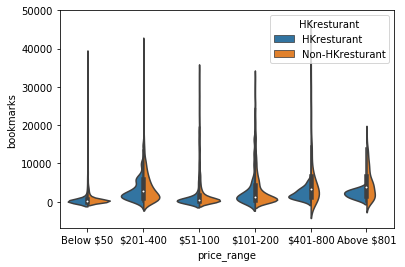

In [44]:
gb_pricerange = openrice2.groupby('price_range')
plot = sns.violinplot(data = openrice2, x='price_range', y='bookmarks', hue='HKresturant', split=True)

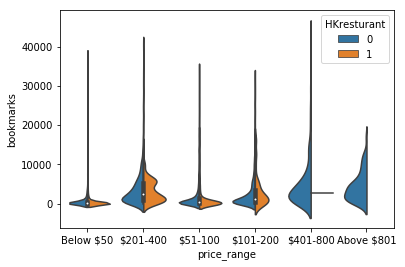

In [69]:
#Should look something like this

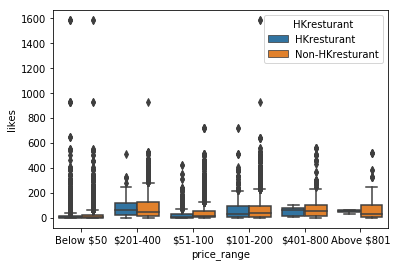

In [45]:
plot = sns.boxplot(data = openrice2, x = 'price_range', y = 'likes', hue='HKresturant')

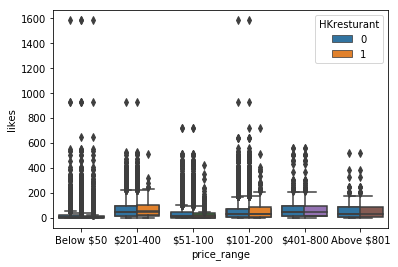

In [64]:
#and this

# Unicef Data

When working with data we may aberiviate the columns names to make them simpler to type. However we need to be anle to change them back 


In [2]:
import pandas as pd

In [46]:
df = pd.read_csv("https://raw.githubusercontent.com/jackiekazil/data-wrangling/master/data/unicef/mn.csv")

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (110,111,112,120) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
df.head()

,Unnamed: 0,HH1,HH2,LN,MWM1,MWM2,MWM4,MWM5,MWM6D,MWM6M,...,MCSURV,MCDEAD,mwelevel,mnweight,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
0,1,1,17,1,1,17,1,14,7,4,...,0.0,0.0,Higher,0.403797,1.603670,5,1.272552,5.0,NaN,NaN
1,2,1,20,1,1,20,1,14,7,4,...,0.0,0.0,Higher,0.403797,1.543277,5,1.089026,5.0,NaN,NaN
2,3,2,1,1,2,1,1,9,8,4,...,3.0,0.0,Primary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN
3,4,2,1,5,2,1,5,9,12,4,...,NaN,NaN,NaN,0.000000,0.000000,0,0.000000,0.0,0.0,0.0
4,5,2,1,8,2,1,8,9,8,4,...,0.0,0.0,Secondary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN


 ** 1.) ** Drop the unnamed column

In [69]:
named_col = [i for i in df.columns if "Unnamed" not in i]
new_df = df[named_col]
new_df.head()

,HH1,HH2,LN,MWM1,MWM2,MWM4,MWM5,MWM6D,MWM6M,MWM6Y,...,MCSURV,MCDEAD,mwelevel,mnweight,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
0,1,17,1,1,17,1,14,7,4,2014,...,0.0,0.0,Higher,0.403797,1.603670,5,1.272552,5.0,NaN,NaN
1,1,20,1,1,20,1,14,7,4,2014,...,0.0,0.0,Higher,0.403797,1.543277,5,1.089026,5.0,NaN,NaN
2,2,1,1,2,1,1,9,8,4,2014,...,3.0,0.0,Primary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN
3,2,1,5,2,1,5,9,12,4,2014,...,NaN,NaN,NaN,0.000000,0.000000,0,0.000000,0.0,0.0,0.0
4,2,1,8,2,1,8,9,8,4,2014,...,0.0,0.0,Secondary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN


** 2.) ** Use the data in `header_df` to replace the `Name` with it's `Label` in the original dataframe.

In [57]:
header_df = pd.read_csv("https://raw.githubusercontent.com/jackiekazil/data-wrangling/master/data/unicef/mn_headers.csv")

In [58]:
header_df.head()

,Name,Label,Question
0,HH1,Cluster number,NaN
1,HH2,Household number,NaN
2,LN,Line number,NaN
3,MWM1,Cluster number,NaN
4,MWM2,Household number,NaN


In [71]:
list_labelobj = [header_df.loc[header_df['Name']== ColName]['Label'] for ColName in new_df.columns] 
list_label = [iLabel.to_string(name = False, index = False) for iLabel in list_labelobj]
#list_label
new_df.columns = list_label
new_df.head()

,Cluster number,Household number,Line number,Cluster number,Household number,Man's line number,Interviewer number,Day of interview,Month of interview,Year of interview,...,Children surviving,Children dead,"Series([], )","Series([], )",Wealth index score,Wealth index quintiles,"Series([], )","Series([], )","Series([], )","Series([], )"
0,1,17,1,1,17,1,14,7,4,2014,...,0.0,0.0,Higher,0.403797,1.603670,5,1.272552,5.0,NaN,NaN
1,1,20,1,1,20,1,14,7,4,2014,...,0.0,0.0,Higher,0.403797,1.543277,5,1.089026,5.0,NaN,NaN
2,2,1,1,2,1,1,9,8,4,2014,...,3.0,0.0,Primary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN
3,2,1,5,2,1,5,9,12,4,2014,...,NaN,NaN,NaN,0.000000,0.000000,0,0.000000,0.0,0.0,0.0
4,2,1,8,2,1,8,9,8,4,2014,...,0.0,0.0,Secondary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN


# Ricacorp

** 1.) ** Reading in the file. *Hint*  Which type of format it is? Also you'll need to change the encoding to 'utf-16'

In [92]:
fpath = "data/ricacorp-real-estate-sales.tsv"
df = pd.read_csv(fpath, sep = '\t', encoding='utf-16')

** 2.) ** Remove the useless columns like web-scraper-order, pagination etc.

In [94]:
list_useless_col = [label for label in df.columns if 'web-scraper' in label or 'pagination' in label]
new_df = df.drop(columns = list_useless_col)

** 3.) ** *Bonus* - In collumns that should be numerical use regular expressions to get the numbers and convert the columns from strings to numerical.

In [95]:

import re
col_loan = [re.search(r'\b(\d+)\%',i).group(1) for i in df['loan %']]
new_df['loan %'] = [float(i)/100 for i in col_loan]
new_df.head()

,Area,characteristic,floor type,hkd millions,rent hkd,area,address,last updated,pay per month,loan %,1st payment
0,Kowloon,"Quiet & Boutique Living, Unrivalled Luxury",High Floor Zone (Flat 3),26.50,NaN,"Area :\n1,137Ft ($23.3k/Ft)",Kowloon Tong/Beacon Hill Flat 3 Block A Penins...,Last Updated : 21-02-2018,Pay/M︰$70.2k,0.5,1st Pay︰$13.25M
1,Kowloon,"Invite Offers, For Sale & For Lease",High Floor Zone (Flat -) ...,7.50,Rent $17k\n ...,Area :\n485Ft ($15.4k/Ft),Cheung Sha Wan West Flat - Tower 1 Phase 2 The...,Last Updated : 23-02-2018,Pay/M︰$23.8k,0.6,1st Pay︰$3M
2,Kowloon,"Spacious Rooms, High Privacy",Low Floor Zone (Flat E) ...,18.00,Rent $40k\n ...,Area :\n794Ft ($22.6k/Ft),Kowloon Station Flat E Tower 2 Phase 1 The Wat...,Last Updated : 13-03-2018,Pay/M︰$47.6k,0.5,1st Pay︰$9M
3,Kowloon,"Good Layout & Efficient, Unrepeatable Opportunity",Low Floor Zone (Flat -) ...,13.98,NaN,Area :\n971Ft ($14.3k/Ft),Cheung Sha Wan West Flat - Tower 2 One West Ko...,Last Updated : 22-02-2018,Pay/M︰$37k,0.5,1st Pay︰$6.99M
4,Kowloon,"Spacious Rooms, Tranquil Garden View",Low Floor Zone (Flat AB) ...,25.00,NaN,"Area :\n1,502Ft ($16.6k/Ft)",Whampoa/Laguna Verde Flat AB Tower 10 Phase 2 ...,Last Updated : 13-03-2018,Pay/M︰$66.2k,0.5,1st Pay︰$12.5M
